# Introduction to Data Science with Python 
## General Assembly - 18th July 2017 Day 1##

This notebook contains exercises for getting started with network analysis in Python. The main topics we will cover in this class are:
1. Analysing a network
2. Plotting a network

In [1]:
# Install Networkx
! pip install networkx 

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
G_fb = nx.read_edgelist("../../data/facebook_combined.txt", create_using = nx.Graph(), nodetype = int)

In [6]:

#Quick snapshot of the Network
print (nx.info(G_fb))

Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910


In [7]:
#Create network layout for visualizations
spring_pos = nx.spring_layout(G_fb)

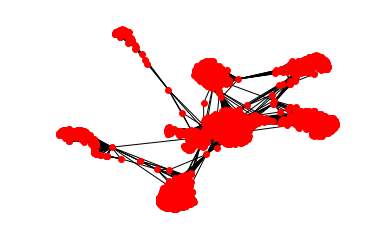

In [8]:
plt.axis("off")
nx.draw_networkx(G_fb, pos = spring_pos, with_labels = False, node_size = 35)

In [9]:
from multiprocessing import Pool
import itertools

In [10]:
def partitions(nodes, n):
    "Partitions the nodes into n subsets"
    nodes_iter = iter(nodes)
    while True:
        partition = tuple(itertools.islice(nodes_iter,n))
        if not partition:
            return
        yield partition

In [11]:
def btwn_pool(G_tuple):
    return nx.betweenness_centrality_source(*G_tuple)

In [12]:
def between_parallel(G, processes = None):
    p = Pool(processes=processes)
    part_generator = 4*len(p._pool)
    node_partitions = list(partitions(G.nodes(), int(len(G)/part_generator)))
    num_partitions = len(node_partitions)
 
    bet_map = p.map(btwn_pool,
                        zip([G]*num_partitions,
                        [True]*num_partitions,
                        [None]*num_partitions,
                        node_partitions))
 
    bt_c = bet_map[0]
    for bt in bet_map[1:]:
        for n in bt:
            bt_c[n] += bt[n]
    return bt_c

In [ ]:

bt = between_parallel(G_fb)
top = 10

max_nodes =  sorted(bt.items(), key = lambda v: -v[1])[:top]
bt_values = [5]*len(G_fb.nodes())
bt_colors = [0]*len(G_fb.nodes())
for max_key, max_val in max_nodes:
    bt_values[max_key] = 150
    bt_colors[max_key] = 2
 
plt.axis("off")
nx.draw_networkx(G_fb, pos = spring_pos, cmap = plt.get_cmap("rainbow"), node_color = bt_colors, node_size = bt_values, with_labels = False)


## Extra Tasks##

1. Find the k-clique communities in this network
2. What is the centrality of node 14?
3. Run a hive plot of the data with 2 k-clique communities as the dimensions

In [ ]:
!pip

In [ ]:
import tensorflow as tf